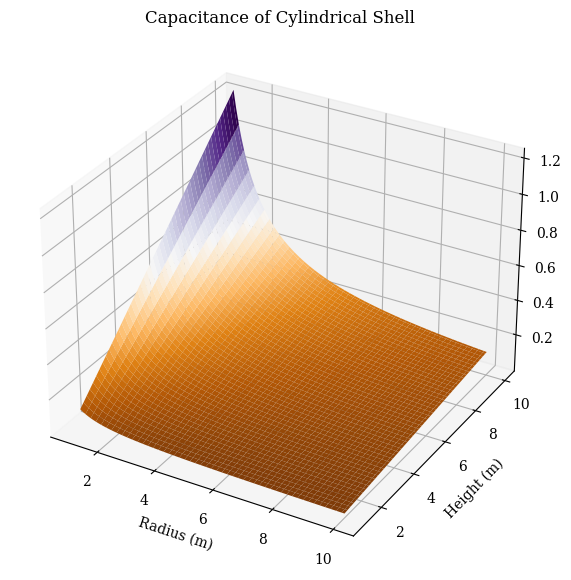

NameError: ignored

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
plt.rcParams["font.family"] = "serif"

def calculate_cross_capacitance(radius, height):
    epsilon_0 = 8.854e-12  # Permittivity of free space
    
    C0 = (epsilon_0 / np.pi) * np.log(2)
    
    # Calculate the capacitance per unit length
    C_per_unit_length = C0 / height
    
    # Calculate the total capaacitance for the given radius and height
    capacitance = C_per_unit_length * (2 * np.pi * radius)
    
    return capacitance

# Generate a range of radii and heights
radii = np.linspace(1, 10, 100)
heights = np.linspace(1, 10, 100)

# Calculate the capacitance for each combination of radius and height
capacitance_matrix = np.zeros((len(radii), len(heights)))
for i, radius in enumerate(radii):
    for j, height in enumerate(heights):
        capacitance = calculate_cross_capacitance(radius, height)
        capacitance_matrix[i, j] = capacitance

# Plot the capacitance as a function of radius and height

X, Y = np.meshgrid(radii, heights)
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, capacitance_matrix,  cmap='PuOr')
ax.set_xlabel('Radius (m)')
ax.set_ylabel('Height (m)')
plt.title('Capacitance of Cylindrical Shell')
plt.show()
#plt.savefig('3Dplot.png')
f#iles.download('3Dplot.png')



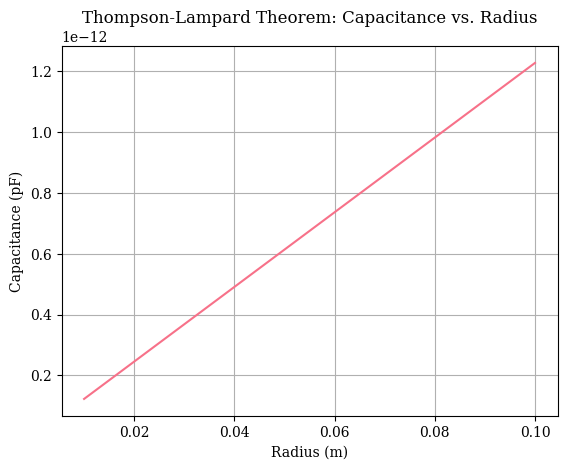

In [17]:

epsilon_0 = 8.8541878128e-12  # Vacuum permittivity (F/m)
pi = np.pi

# Define the range of radii
radius = np.linspace(0.01, 0.1, 10)  # Radius in meters

# Calculate capacitance per unit length (C/m)
C_per_unit_length = epsilon_0 / pi * np.log(2)  # pF/m

# Calculate the capacitance for each radius
capacitance = C_per_unit_length * (2 * pi * radius)  # pF

# Plot the results
plt.figure()
plt.plot(radius, capacitance)
plt.xlabel('Radius (m)')
plt.ylabel('Capacitance (pF)')
plt.title('Thompson-Lampard Theorem: Capacitance vs. Radius')
plt.grid(True)
plt.show()


Exact Values of Convergence:
a = 0.10: 0.00000000000195354904
a = 0.20: 0.00000000000195354904
a = 0.30: 0.00000000000195354904
a = 0.40: 0.00000000000195354904
a = 0.50: 0.00000000000195354904
a = 0.60: 0.00000000000195354904
a = 0.70: 0.00000000000195354904
a = 0.80: 0.00000000000195354904
a = 0.90: 0.00000000000195354904
a = 1.00: 0.00000000000195354904


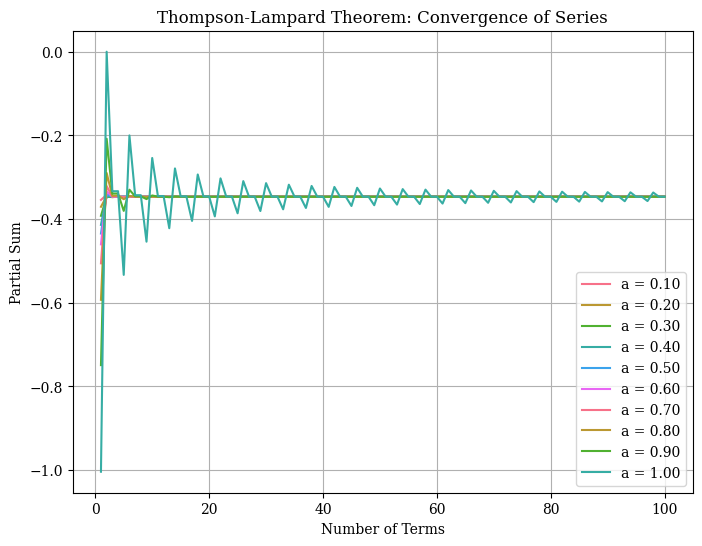

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon_0 = 8.8541878128e-12  # Vacuum permittivity (F/m)
pi = np.pi

# Define the coefficient function
def coefficient(n, a):
    bn_prime = (1 - np.cos(n * pi / 2)) * ((-1) ** n * np.cosh(n * pi * a) - np.cos(n * pi / 2))
    bn_prime += (np.cos(n * pi * a) - (-1) ** n) * (np.cos(n * pi * a) - np.cosh(n * pi / 2))
    return bn_prime

# Define the partial sum function
def partial_sum(N, a):
    sum_terms = np.zeros(N)
    for n in range(1, N + 1):
        sum_terms[n-1] = coefficient(n, a) / (n * np.sinh(n * pi))
    return sum_terms.cumsum()

# Define the exact value of convergence
def exact_convergence(a):
    return (epsilon_0 / pi) * np.log(2)

# Define the range of terms to consider in the series
N = 100

# Define the range of parameter 'a'
a_values = np.linspace(0.1, 1.0, 10)

# Calculate the partial sum for each 'a' value
sums = np.zeros((len(a_values), N))
for i, a in enumerate(a_values):
    sums[i, :] = partial_sum(N, a)

# Calculate the exact value of convergence for each 'a' value
exact_values = np.array([exact_convergence(a) for a in a_values])

# Plot the partial sum for each 'a' value
fig = plt.figure(figsize=(8,6))
for i, a in enumerate(a_values):
    plt.plot(range(1, N + 1), sums[i, :], label=f'a = {a:.2f}')
plt.xlabel('Number of Terms')
plt.ylabel('Partial Sum')
plt.title('Thompson-Lampard Theorem: Convergence of Series')
plt.legend()
plt.grid(True)

# Print the exact value of convergence for each 'a' value
print('Exact Values of Convergence:')
for i, a in enumerate(a_values):
    print(f'a = {a:.2f}: {exact_values[i]:.20f}')

plt.show()


In [31]:
import numpy as np

# Constants
epsilon_0 = 8.8541878128e-12  # Vacuum permittivity (F/m)
pi = np.pi

# Define the coefficient function
def coefficient(n, a):
    bn_prime = (1 - np.cos(n * pi / 2)) * ((-1) ** n * np.cosh(n * pi * a) - np.cos(n * pi / 2))
    bn_prime += (np.cos(n * pi * a) - (-1) ** n) * (np.cos(n * pi * a) - np.cosh(n * pi / 2))
    return bn_prime

# Define the exact value of convergence
def exact_convergence(a):
    return (epsilon_0 / pi) * np.log(2)

# Define the convergence check function
def check_convergence(a, tolerance=1e-10):
    exact_value = exact_convergence(a)
    N = 1
    partial_sum = coefficient(1, a) / (1 * np.sinh(pi))
    while np.abs((partial_sum - exact_value) / exact_value) > tolerance:
        N += 1
        partial_sum += coefficient(N, a) / (N * np.sinh(N * pi))
    return N

# Define the range of parameter 'a'
a_values = np.linspace(0.1, 1.0, 10)

# Check convergence and print the exact values
for a in a_values:
    convergence_terms = check_convergence(a)
    exact_value = exact_convergence(a)
    print(f'a = {a:.2f}: Convergence after {convergence_terms} terms. Exact value: {exact_value:.20f}')

print((epsilon_0 / pi) * np.log(2))


a = 0.10: Convergence after 452 terms. Exact value: 0.00000000000195354904
a = 0.20: Convergence after 453 terms. Exact value: 0.00000000000195354904
a = 0.30: Convergence after 453 terms. Exact value: 0.00000000000195354904
a = 0.40: Convergence after 452 terms. Exact value: 0.00000000000195354904
a = 0.50: Convergence after 453 terms. Exact value: 0.00000000000195354904
a = 0.60: Convergence after 377 terms. Exact value: 0.00000000000195354904
a = 0.70: Convergence after 324 terms. Exact value: 0.00000000000195354904
a = 0.80: Convergence after 283 terms. Exact value: 0.00000000000195354904
a = 0.90: Convergence after 252 terms. Exact value: 0.00000000000195354904
a = 1.00: Convergence after 226 terms. Exact value: 0.00000000000195354904
1.9535490419414216e-12


<ipython-input-31-efbbe55911dd>:24: RuntimeWarning: overflow encountered in double_scalars
  partial_sum += coefficient(N, a) / (N * np.sinh(N * pi))
<ipython-input-31-efbbe55911dd>:24: RuntimeWarning: overflow encountered in sinh
  partial_sum += coefficient(N, a) / (N * np.sinh(N * pi))
<ipython-input-31-efbbe55911dd>:10: RuntimeWarning: overflow encountered in double_scalars
  bn_prime += (np.cos(n * pi * a) - (-1) ** n) * (np.cos(n * pi * a) - np.cosh(n * pi / 2))
<ipython-input-31-efbbe55911dd>:24: RuntimeWarning: invalid value encountered in double_scalars
  partial_sum += coefficient(N, a) / (N * np.sinh(N * pi))
<ipython-input-31-efbbe55911dd>:10: RuntimeWarning: overflow encountered in cosh
  bn_prime += (np.cos(n * pi * a) - (-1) ** n) * (np.cos(n * pi * a) - np.cosh(n * pi / 2))
<ipython-input-31-efbbe55911dd>:9: RuntimeWarning: overflow encountered in cosh
  bn_prime = (1 - np.cos(n * pi / 2)) * ((-1) ** n * np.cosh(n * pi * a) - np.cos(n * pi / 2))
<ipython-input-31-efbbe5

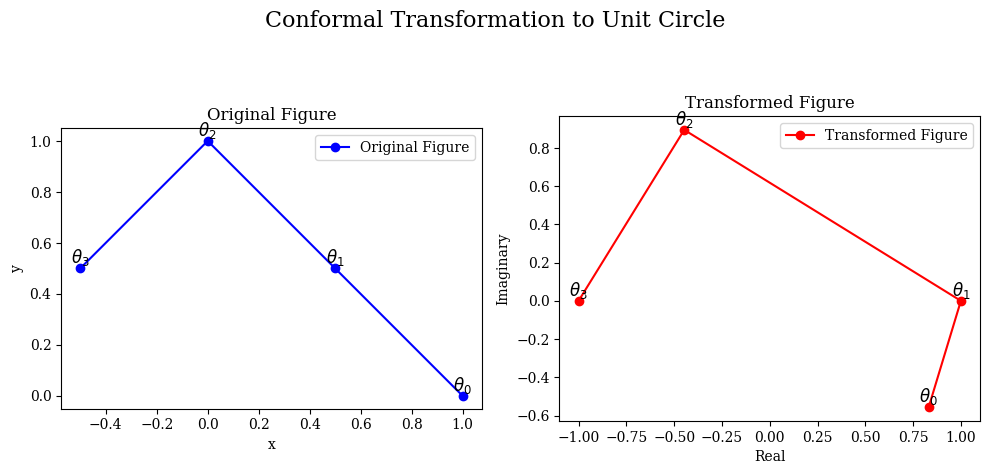

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def conformal_transform(points):
    """
    Perform a conformal transformation of a closed figure to the unit circle.
    """
    # Compute the centroid of the figure
    centroid = np.mean(points, axis=0)

    # Translate the points to have the centroid at the origin
    translated_points = points - centroid

    # Compute the radius of the circle
    radius = np.max(np.linalg.norm(translated_points, axis=1))

    # Scale the points to fit within the unit circle
    scaled_points = translated_points / radius

    # Perform the conformal transformation
    angles = np.arctan2(scaled_points[:, 1], scaled_points[:, 0])
    transformed_points = np.exp(1j * angles)

    return transformed_points, angles

# Example usage
# Define the points on the closed figure
points = np.array([(1, 0), (0.5, 0.5), (0, 1), (-0.5, 0.5)])

# Perform the conformal transformation
transformed_points, angles = conformal_transform(points)

# Plot the original and transformed figures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Conformal Transformation to Unit Circle', fontsize=16)

# Plot the original figure
ax1.plot(points[:, 0], points[:, 1], 'bo-', label='Original Figure')
ax1.set_aspect('equal')
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Original Figure')

# Plot the transformed figure
ax2.plot(np.real(transformed_points), np.imag(transformed_points), 'ro-', label='Transformed Figure')
ax2.set_aspect('equal')
ax2.legend()
ax2.set_xlabel('Real')
ax2.set_ylabel('Imaginary')
ax2.set_title('Transformed Figure')

# Add the angles to the plot
for i in range(len(points)):
    ax1.text(points[i, 0], points[i, 1], f'$\\theta_{i}$', fontsize=12, ha='center', va='bottom')
    ax2.text(np.real(transformed_points[i]), np.imag(transformed_points[i]), f'$\\theta_{i}$', fontsize=12, ha='center', va='bottom')

plt.tight_layout()
plt.show()
